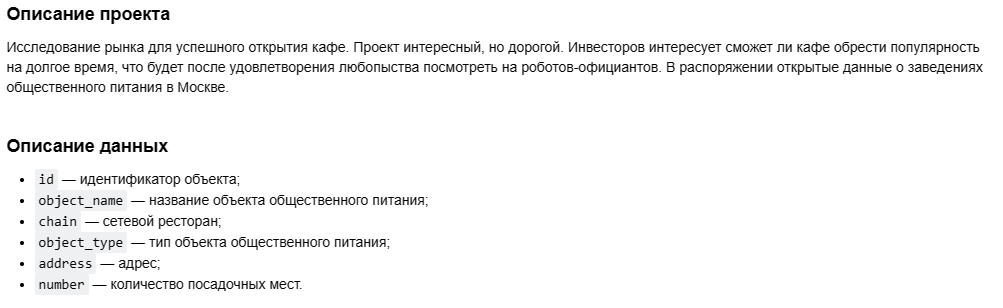

In [1]:
# Библиотеки
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
from io import BytesIO
import requests
import re
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')


In [2]:
# Открываем файлы по ресторанам
try:
    data = pd.read_csv('/datasets/rest_data.csv')
except:
    path_1 = 'D://Kseniia//Praktikum//проекты//' 
    data = pd.read_csv(path_1 + 'rest_data.csv')
    
# Открываем файлы по реестру улиц Москвы
#https://docs.google.com/spreadsheets/d/13LkGua8GZe17CmmqzuXKt1n4CvrxwBMj7bLG6jOt9Nw/edit?usp=sharing
try:
    spreadsheet_id = '13LkGua8GZe17CmmqzuXKt1n4CvrxwBMj7bLG6jOt9Nw'
    file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
    r = requests.get(file_name)
    moscow_registry = pd.read_csv(BytesIO(r.content))

except:
    moscow_registry = pd.read_csv(path_1 + 'moscow_registry_ok.csv')
 

In [3]:
# Основная информация о таблице
display(data.sample(10))


,id,object_name,chain,object_type,address,number
870,27119,Кампус,нет,кафе,"город Москва, Первомайская улица, дом 94",96
210,29282,ГБОУ СОШ № 641 им. Сергея Есенина,нет,столовая,"город Москва, Волгоградский проспект, дом 66, корпус 4",196
10963,175579,ШАУРМА. ГРИЛЬ,нет,кафе,"город Москва, улица Горбунова, дом 7, корпус 2",1
8926,159533,ТАКЭ ДО,нет,ресторан,"город Москва, Кутузовский проспект, дом 17",78
242,133485,Суши Сет,да,магазин (отдел кулинарии),"город Москва, улица Героев Панфиловцев, дом 1, корпус 1",4
7609,60475,Кафе Султан,нет,кафе,"город Москва, улица Красного Маяка, дом 2Б",40
7909,69439,Фрукты и овощи,нет,кафе,"город Москва, Нижняя Сыромятническая улица, дом 10, строение 12",26
5646,29556,Столовая ГАОУ ВО МГПУ,нет,столовая,"город Москва, улица Чечулина, дом 1",120
6687,84041,Спеттаколо,нет,ресторан,"город Москва, Кутузовский проспект, дом 48",98
11898,182144,САБВЕЙ,да,кафе,"город Москва, улица Лобачевского, дом 112А, строение 2",10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [5]:
display(moscow_registry.sample(10))

,address,district
401439,"город москва, поселение кленовское, территория снт ""ясенки"" окб ""гидропресс"", владение 118, строение 1",поселение Кленовское
519127,"город москва, поселение роговское, деревня каменка, центральная улица, владение 19а",поселение Роговское
660923,"город москва, поселение сосенское, деревня летово, зимёнковская улица, дом 16",поселение Сосенское
273350,NaN,NaN
677049,"город москва, поселение михайлово-ярцевское, деревня дровнино, центральная улица, дом 18",поселение Михайлово-Ярцевское
288880,NaN,NaN
453053,"город москва, поселение кленовское, квартал № 432, владение 20",поселение Кленовское
427198,NaN,NaN
318420,NaN,NaN
211009,"город москва, внутригородская территория муниципальный округ кузьминки, волгоградский проспект, дом 132, корпус 2",муниципальный округ Кузьминки


In [6]:
moscow_registry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848772 entries, 0 to 848771
Data columns (total 2 columns):
address     424386 non-null object
district    424386 non-null object
dtypes: object(2)
memory usage: 13.0+ MB


In [7]:
# Проверка на дубликаты
data.duplicated().sum()

0

In [8]:
# Проверка на дубликаты
moscow_registry.duplicated().sum()

425541

In [9]:
moscow_registry = moscow_registry.drop_duplicates().reset_index(drop = True)

In [10]:
# Изменим название категорий для лучшего отображения на графиках
data['object_type'] = data['object_type'].replace('предприятие быстрого обслуживания', 'фаст фуд')
data['object_type'] = data['object_type'].replace('магазин (отдел кулинарии)', 'магазин')

In [11]:
# Обработка данных c 0 кол-вом посадочных мест
number_object_type = data.groupby('object_type')[['number']].median().reset_index()
number_object_type.columns =['object_type', 'number_median']
data = pd.merge(data, number_object_type, on = 'object_type')
data.loc[data['number']==0, 'number'] = data['number_median']
data = data.drop(columns = 'number_median')
display(data.sample(10))

,id,object_name,chain,object_type,address,number
4292,179616,Кафе при АЗС «Газпромнефть»,нет,кафе,"город Москва, Шипиловский проезд, владение 29",5
7027,153766,Столовая при ФГБОУ ВО МГЛУ,нет,столовая,"город Москва, улица Остоженка, дом 38, строение 1",120
4829,198387,Cafe 88,нет,кафе,"город Москва, Вешняковская улица, дом 23",95
5516,213382,Солнцевский замок,нет,кафе,"город Москва, Лукинская улица, дом 17",40
15223,177747,Советские пончики,нет,магазин,"город Москва, Открытое шоссе, дом 9, строение 14А",0
1899,23099,Крошка Картошка,да,кафе,"город Москва, улица Декабристов, дом 12",96
13350,120857,Кафе на АЗС,нет,кафетерий,"город Москва, город Троицк, 39-й километр Калужского шоссе, дом 13Г",18
14393,141438,На кранах,нет,бар,"город Москва, Цветной бульвар, дом 19, строение 5",48
6588,23137,Самса Хаус,нет,столовая,"город Москва, Широкая улица, дом 12",103
2145,20780,ФрайЧикен,нет,кафе,"город Москва, шоссе Энтузиастов, дом 12, корпус 2",40


##### Выводы

Для работы дан 1 файл. Пропусков в данных  визуально нет, однако было существенное количество нулевых значений в стобце `number`. Возможные причины таких значений две: в предприятии питания действительно нет посадочных мест и оно работает на вынос или ошибка(возможно человеческий фактор). Было принято решение заменить нулевые значения медианными значениеми по типу предприятия.Для удобства и визуально эстетического восприятия были переименованны столбцы с длинными значениями. Дополнительно считан необходимый файл с реестром улиц и районов Москвы. В файле были найдены и удалены дубликаты.

### 2. Анализ данных

#### 2.1. Исследуем соотношение видов объектов общественного питания по количеству. Построим график.

In [12]:
# Cоотношение видов объектов общественного питания по количеству
object_type_group = data.groupby('object_type').agg({'id':'nunique'}).reset_index().sort_values(by='id')
display(object_type_group)

,object_type,id
5,магазин,273
2,закусочная,360
4,кафетерий,398
1,буфет,585
0,бар,856
8,фаст фуд,1923
6,ресторан,2285
7,столовая,2587
3,кафе,6099


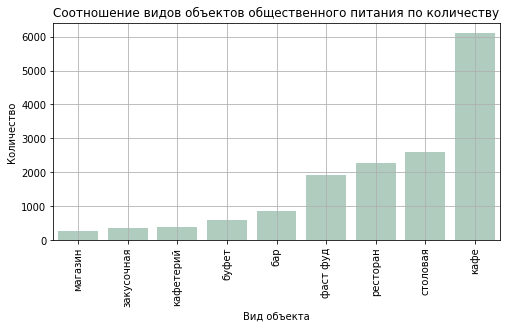

In [13]:
# График
plt.figure(figsize=(8,4))

ax = sns.barplot(x='object_type', y='id', data=object_type_group, color='#AAD1C0')
ax.set_title('Соотношение видов объектов общественного питания по количеству')
ax.set_xlabel('Вид объекта')
ax.set_ylabel('Количество')
ax.grid(True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
None



##### Выводы

Судя по графику больше всего кафе, столовых, ресторанов и предприятий быстрого обслуживания(фаст фуд). Наименьшее количество закусочных и магазинов(с отделами кулинарии).

#### 2.2. Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.

In [14]:
# Cоотношение сетевых и несетевых заведений по количеству
chain_group = data.groupby('chain').agg({'id':'nunique'}).reset_index()

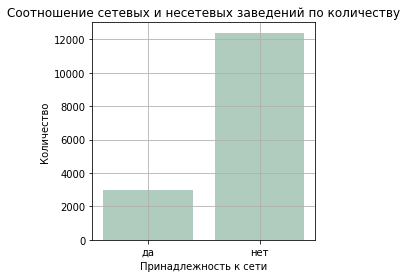

In [15]:
# График
plt.figure(figsize=(4,4))
ax = sns.barplot(x='chain', y='id', data=chain_group, color='#AAD1C0')
ax.set_title('Cоотношение сетевых и несетевых заведений по количеству')
ax.set_xlabel('Принадлежность к сети')
ax.set_ylabel('Количество')
ax.grid(True)
None


##### Выводы

Несетевых предприятий оказалось больше

#### 2.3. Для какого вида объекта общественного питания характерно сетевое распространение?

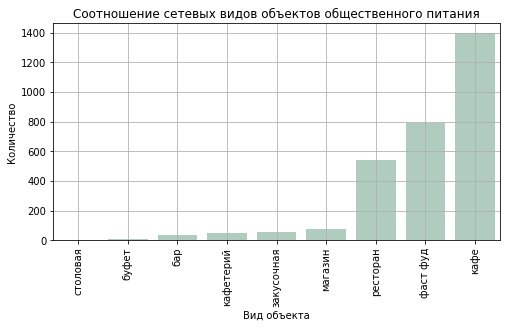

In [16]:
object_type_chain = data. query('chain =="да"').groupby('object_type').agg({'id':'nunique'}).reset_index().sort_values(by='id')

# График
plt.figure(figsize=(8,4))
ax = sns.barplot(x='object_type', y='id', data=object_type_chain, color='#AAD1C0')
ax.set_title('Соотношение сетевых видов объектов общественного питания')
ax.set_xlabel('Вид объекта')
ax.set_ylabel('Количество')
ax.grid(True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
None



##### Выводы

Кафе, предприятия быстрого обслуживания(фаст фуд) и рестораны чаще всего бывают сетевыми.

#### 2.4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [17]:
# Отсортируем только сетевые предприятия
number_group = data[data['chain']=="да"].sort_values(by = 'number')
display(number_group.sample(10))

,id,object_name,chain,object_type,address,number
1918,26929,Му-Му,да,кафе,"город Москва, улица Пришвина, дом 22",90
8874,174431,Крошка Картошка,да,закусочная,"город Москва, улица Красного Маяка, дом 2Б",35
9921,164396,Кофе с собой,да,фаст фуд,"город Москва, Ленинградский проспект, дом 33, корпус 4",5
2898,24316,Менза,да,кафе,"город Москва, улица Большая Дмитровка, дом 32, строение 1",48
5236,200440,Додо Пицца,да,кафе,"город Москва, Суздальская улица, дом 30/2",12
12923,190895,Магбургер,да,ресторан,"город Москва, поселение Щаповское, деревня Троицкое, дом 3Б/Н",24
1414,142570,Квартира 44,да,кафе,"город Москва, улица Малая Ордынка, дом 24",38
9863,161988,Суши Wok,да,фаст фуд,"город Москва, улица Руднёвка, дом 9",1
1696,87588,Пиццерия «Папа Джонс»,да,кафе,"город Москва, Большой Факельный переулок, дом 3, строение 2",15
4567,69440,Бакинский бульвар,да,кафе,"город Москва, улица Земляной Вал, дом 18, строение 4",186


In [18]:
# Посмотрим разпределение заведений по количеству посадочных мест
number_group['number'].describe()

count    2968.000000
mean       54.291442
std        56.372219
min         0.000000
25%        16.000000
50%        40.000000
75%        75.000000
max       580.000000
Name: number, dtype: float64

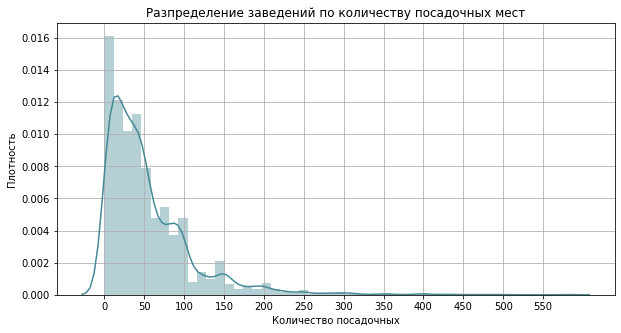

In [19]:
# График плотности распределения по количеству мест
plt.figure(figsize=(10,5))
ax = sns.distplot(number_group['number'], axlabel = 'Количество посадочных', color='#448A96') 
ax.set_xticks(np.arange(0, 600, 50))
ax.grid(True)
plt.title('Разпределение заведений по количеству посадочных мест')
plt.ylabel('Плотность')
None


In [20]:
print('95-й и 99-й перцентили по количеству мест')
print(np.percentile(number_group['number'], [95,99])) 

95-й и 99-й перцентили по количеству мест
[158.65 275.33]


In [21]:
# Посмотрим разпределение заведений по количеству посадочных мест
number_group[number_group['number']<=158]['number'].describe()

count    2819.000000
mean       45.036538
std        36.419453
min         0.000000
25%        15.000000
50%        38.000000
75%        65.000000
max       158.000000
Name: number, dtype: float64

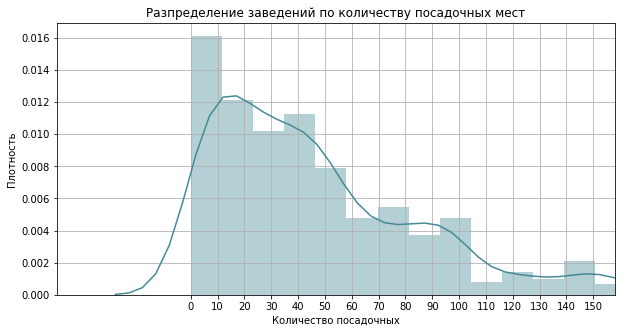

In [22]:
# График плотности без выбросов
plt.figure(figsize=(10,5))
ax = sns.distplot(number_group['number'], axlabel = 'Количество посадочных', color='#448A96')
ax.set_xticks(np.arange(0, 200, 10))
ax.grid(True)
plt.xlim([-50, 158])
plt.title('Разпределение заведений по количеству посадочных мест')
plt.ylabel('Плотность')
None


##### Выводы

Анализ по распределения по количеству посадочных мест в заведениях показал следующее:
- в выборке присутствую аномально большие покаказатели, которые влияют на общую картину 
- есть предприятия только с опцией "на вынос" и нулевым количеством посадочных мест
- максимальное количество посадочных мест в заведениях 580, а после 'очистки' данных около 158
- Не более 25% предприятий имеют до 16 посадочных мест, после 'очистки' данных 15 посадочных
- средний показатель по количеству около 40 мест, после 'очистки' данных около 38
- Не более 75% предприятий имеют до 75 посадочных мест, после 'очистки' данных 65 места

В итоге по количеству посадочных мест предприятия  можно условно разделить на 5 групп:
- на вынос
- от 1 до 15 посадочных мест
- от 16 до 38 посадочных мест
- от 39 до 65 посадочных мест
- свыше 66 посадочных мест

#### 2.5. Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Построим графики.

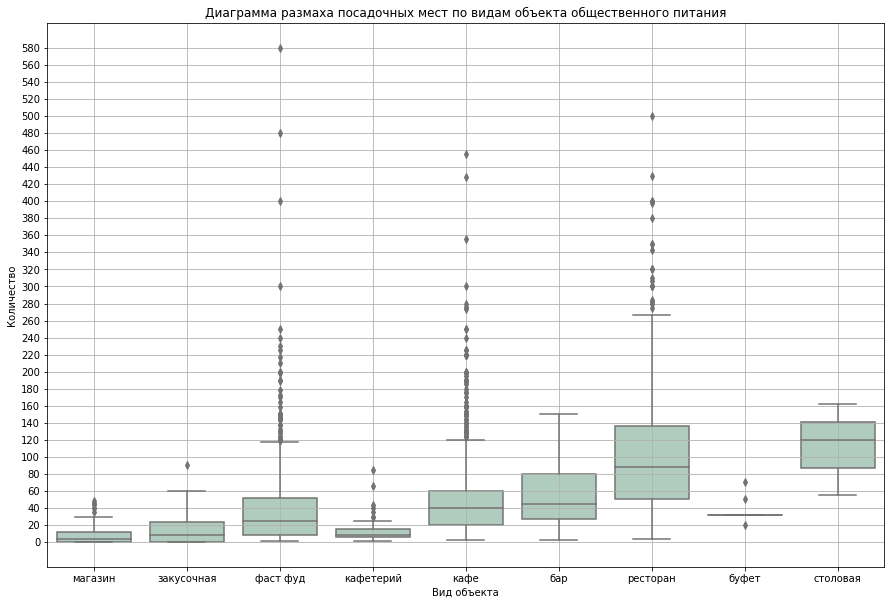

In [23]:
# График
plt.figure(figsize=(15,10))
ax = sns.boxplot(x='object_type', y='number', data=number_group, color='#AAD1C0')
ax.set_title('Диаграмма размаха посадочных мест по видам объекта общественного питания')
ax.set_xlabel('Вид объекта')
ax.set_ylabel('Количество')
ax.set_yticks(np.arange(0, 600, 20))
ax.grid(True)
None

plt.savefig('object_type_number.png')

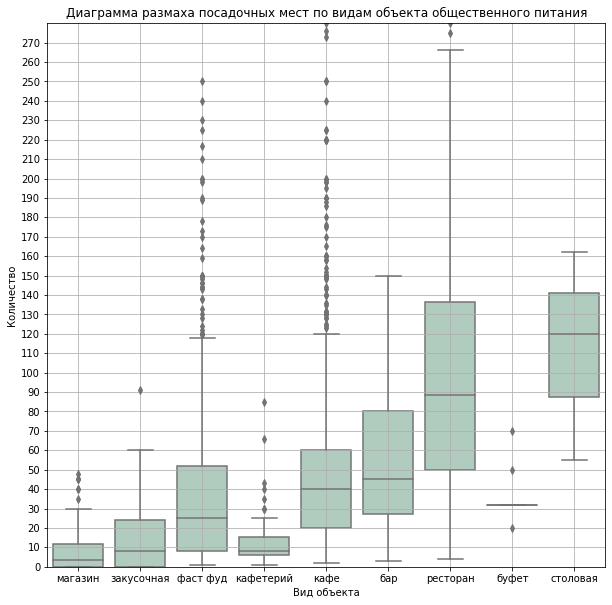

In [24]:
# График укрупненно
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='object_type', y='number', data=number_group, color='#AAD1C0')
ax.set_title('Диаграмма размаха посадочных мест по видам объекта общественного питания')
ax.set_xlabel('Вид объекта')
ax.set_ylabel('Количество')
ax.set_yticks(np.arange(0, 280, 10))
ax.grid(True)
plt.ylim([0, 280])
None



##### Выводы

Для каждого вида объекта общественного питания опишем среднее количество посадочных мест:
- в магазинах(с отделами кулинарии) среднее количество посадочных мест около 4 
- в закусочных среднее количество посадочных мест около 9
- в предприятиях быстрого обслуживания(фаст фуд) среднее количество посадочных мест около 25
- в кафетериях среднее количество посадочных мест около 7
- в кафе среднее количество посадочных мест около 40
- в барах среднее количество посадочных мест около 45
- в ресторанах среднее количество посадочных мест около 89
- в буфетах среднее количество посадочных мест около 33
- в столовых среднее количество посадочных мест около 120

Как показывает график самое большое среднее количество мест встречается в столовых

#### 2.6. Выделим в отдельный столбец информацию об улице из столбца address .

In [25]:
# Все в строчные
data['address'] = data['address'].astype('str').str.lower()

In [26]:
# Москвы много не бывает
def moscow(address):
    if not 'город москва' in address:
        if 'москва' in address:
            address = 'город ' + address 
        else:
            address = 'город москва, ' + address
    return address
data['address'] = data['address'].apply(lambda x: moscow(x))

In [27]:
# Разделим адрес на части
only_streets = data['address']
only_streets = only_streets.str.replace('москва, ', 'москва, !')
only_streets = only_streets.str.replace(', дом', '!, дом')
only_streets = only_streets.str.replace(', владение', '!, владение')
only_streets = only_streets.str.replace(', корпус', '!, корпус')

only_streets = only_streets.str.split('!',  expand=True)
display(only_streets.sample(10))

,0,1,2,3
9764,"город москва,",головинское шоссе,", дом 5",", корпус 1"
9460,"город москва,",проспект вернадского,", дом 6",None
6436,"город москва,",2-я бауманская улица,", дом 5, строение 1",None
14725,"город москва,",улица большая полянка,", дом 7/10, строение 1",None
14446,"город москва,",красная площадь,", дом 3",None
10483,"город москва,",улица пришвина,", дом 26",None
14581,"город москва,",новоданиловская набережная,", дом 6",", корпус 1"
3501,"город москва,",ленинградское шоссе,", дом 58, строение 26",None
14062,"город москва,",улица ивана франко,", владение 33-г",None
11201,"город москва,",фрунзенская набережная,", дом 14",None


In [28]:
data['streets'] = only_streets[1]
display(data.sample(10))

,id,object_name,chain,object_type,address,number,streets
10327,176711,Бургер Кинг,да,фаст фуд,"город москва, улица красного маяка, дом 2б",20,улица красного маяка
7578,27964,СТОЛОВАЯ АВТОКОМБИНАТ ЛУЧ,нет,столовая,"город москва, сигнальный проезд, владение 19, строение 1",50,сигнальный проезд
6567,27412,Столовая Гимназии № 1576 корпус 4,нет,столовая,"город москва, 3-й михалковский переулок, дом 16",190,3-й михалковский переулок
2147,157763,Чайхона,нет,кафе,"город москва, шоссе энтузиастов, дом 12, корпус 2",20,шоссе энтузиастов
2209,88141,Крошка Картошка,да,кафе,"город москва, новоясеневский проспект, дом 1",46,новоясеневский проспект
7770,29280,ГБОУ СОШ № 641 им. Сергея Есенина,нет,столовая,"город москва, улица юных ленинцев, дом 45, корпус 2",250,улица юных ленинцев
956,76128,Крошка Картошка,да,кафе,"город москва, большая сухаревская площадь, дом 1/2, строение 1",36,большая сухаревская площадь
7742,28050,ЭЛКАТ,нет,столовая,"город москва, 2-я кабельная улица, дом 2, строение 50",130,2-я кабельная улица
5203,198118,Крошка Картошка,да,кафе,"город москва, 87-й километр московской кольцевой автодороги, дом 8",10,87-й километр московской кольцевой автодороги
4374,186037,Maxi Pizza,нет,кафе,"город москва, улица 10-летия октября, дом 13, сооружение 1",30,улица 10-летия октября


##### Выводы

Поскольку в текущем регионе используются достаточно сложные составные адреса, которые могут иметь одновременно 2 города( например город Москва, город Троицк, площадь Гагарина дом 6), город + поселение + село (например город москва	поселение краснопахорское, село былово), то принято решение в столбце с улицами не отделять названия город + поселение + село и т.п. В противном случае из-за неполного указания адреса, возможны задвоения или вовсе невозможно будет определить географическое положение предприятия.

#### 2.7. Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [29]:
# Добавим районы
data = pd.merge(data, moscow_registry, on='address', how ='left')

In [30]:
display(data.head(10))

,id,object_name,chain,object_type,address,number,streets,district
0,151635,СМЕТАНА,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова,муниципальный округ Ярославский
1,77874,Родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина,NaN
2,24309,Кафе «Академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица,муниципальный округ Таганский
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица,муниципальный округ Лианозово
4,119365,Кафе «Вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица,муниципальный округ Лианозово
5,148815,Брусника,да,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,переулок сивцев вражек,NaN
6,23394,Гогиели,нет,кафе,"город москва, авиамоторная улица, дом 49/1",24,авиамоторная улица,муниципальный округ Лефортово
7,22579,Алло Пицца,да,кафе,"город москва, улица авиаторов, дом 14",32,улица авиаторов,NaN
8,153644,Американская Лаборатория Десертов,нет,кафе,"город москва, филипповский переулок, дом 15/5",20,филипповский переулок,муниципальный округ Арбат
9,21950,Кафе,нет,кафе,"город москва, алтайская улица, дом 33/7",30,алтайская улица,NaN


In [31]:
# Обработка пропусков в районах
streets_district = data.groupby('streets')[['district']].first().reset_index()
data = pd.merge(data, streets_district,  how ='left', right_on ='streets', left_on ='streets')
display(data.tail(10))

,id,object_name,chain,object_type,address,number,streets,district_x,district_y
15356,211206,Милти,да,магазин,"город москва, первомайская улица, дом 42",0,первомайская улица,муниципальный округ Измайлово,муниципальный округ Измайлово
15357,206185,Милти,да,магазин,"город москва, кронштадтский бульвар, дом 47",0,кронштадтский бульвар,муниципальный округ Головинский,муниципальный округ Головинский
15358,211506,Милти,да,магазин,"город москва, смольная улица, дом 14",0,смольная улица,муниципальный округ Головинский,муниципальный округ Головинский
15359,211247,Милти,да,магазин,"город москва, святоозерская улица, дом 1а",0,святоозерская улица,муниципальный округ Косино-Ухтомский,муниципальный округ Косино-Ухтомский
15360,211223,Магазин готовой еды «Милти»,да,магазин,"город москва, улица ленинская слобода, дом 19",0,улица ленинская слобода,муниципальный округ Даниловский,муниципальный округ Даниловский
15361,211277,МИЛТИ,да,магазин,"город москва, волоколамское шоссе, дом 142",0,волоколамское шоссе,муниципальный округ Митино,муниципальный округ Сокол
15362,211229,МИЛТИ,да,магазин,"город москва, пятницкое шоссе, дом 18",0,пятницкое шоссе,муниципальный округ Митино,муниципальный округ Митино
15363,211228,МИЛТИ,да,магазин,"город москва, дубравная улица, дом 34/29",0,дубравная улица,муниципальный округ Митино,муниципальный округ Митино
15364,211221,МИЛТИ,да,магазин,"город москва, пятницкое шоссе, дом 3",0,пятницкое шоссе,муниципальный округ Митино,муниципальный округ Митино
15365,211201,Милти,да,магазин,"город москва, новослободская улица, дом 4",0,новослободская улица,муниципальный округ Тверской,муниципальный округ Тверской


In [32]:
data.loc[data['district_x'].isna(), 'district_x'] = data['district_y']
data = data.drop(columns = 'district_y')
data = data.rename(columns={'district_x':'district'})
display(data.head(10))

,id,object_name,chain,object_type,address,number,streets,district
0,151635,СМЕТАНА,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова,муниципальный округ Ярославский
1,77874,Родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина,муниципальный округ Таганский
2,24309,Кафе «Академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица,муниципальный округ Таганский
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица,муниципальный округ Лианозово
4,119365,Кафе «Вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица,муниципальный округ Лианозово
5,148815,Брусника,да,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,переулок сивцев вражек,муниципальный округ Арбат
6,23394,Гогиели,нет,кафе,"город москва, авиамоторная улица, дом 49/1",24,авиамоторная улица,муниципальный округ Лефортово
7,22579,Алло Пицца,да,кафе,"город москва, улица авиаторов, дом 14",32,улица авиаторов,муниципальный округ Солнцево
8,153644,Американская Лаборатория Десертов,нет,кафе,"город москва, филипповский переулок, дом 15/5",20,филипповский переулок,муниципальный округ Арбат
9,21950,Кафе,нет,кафе,"город москва, алтайская улица, дом 33/7",30,алтайская улица,муниципальный округ Гольяново


In [33]:
# Топ-10 улиц по количеству объектов
top = data.pivot_table(index=['streets','district'], values='id', 
                       aggfunc = 'count').reset_index().sort_values(by = 'id', ascending=False)
top.columns = ['streets','district', 'amount']
top = top.head(10)
display(top)

,streets,district,amount
1304,пресненская набережная,муниципальный округ Пресненский,167
2128,ходынский бульвар,муниципальный округ Хорошевский,102
1921,улица новый арбат,муниципальный округ Арбат,92
1843,улица ленинская слобода,муниципальный округ Даниловский,89
1351,проспект мира,муниципальный округ Мещанский,89
1347,проспект вернадского,муниципальный округ Тропарево-Никулино,82
833,ленинский проспект,муниципальный округ Якиманка,81
1374,пятницкая улица,муниципальный округ Замоскворечье,80
733,кировоградская улица,муниципальный округ Чертаново Центральное,79
1358,профсоюзная улица,муниципальный округ Академический,78


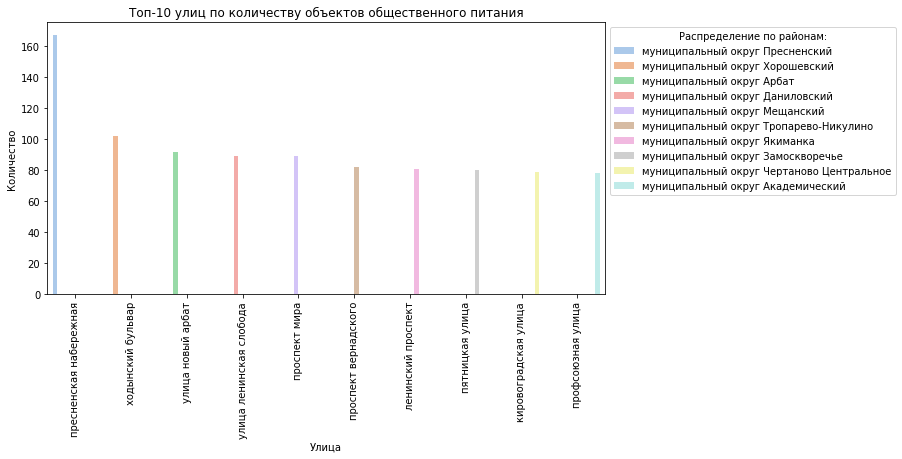

In [34]:
# График
plt.figure(figsize=(10,5))
ax = sns.barplot(x='streets', y='amount', hue='district', data=top, palette = 'pastel')
ax.set_title('Топ-10 улиц по количеству объектов общественного питания')
ax.set_xlabel('Улица')
ax.set_ylabel('Количество')
ax.legend(title = 'Распределение по районам:',loc='upper left', bbox_to_anchor=(1, 1))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
None

plt.savefig('streets.png')

##### Выводы

График топ-10 говорит о том, что больше всего заведений находятся на Пресненской набережной, десятку популярных улиц замыкает Профсоюзная. С помощью данных реестра улиц и районов Москвы мы определили популярные районы. Лидирует муниципальный округ Пресненский, на 10 месте муниципальный округ Академический. По административным округам лидирует ЦАО Москвы.

#### 2.8. Найдем число улиц с одним объектом общественного питания. Воспользуйемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?

In [35]:
# Число улиц с одним объектом
top_one = data.pivot_table(index=['district','streets'], values='id', 
                       aggfunc = 'count').reset_index().sort_values(by = 'id', ascending=False)
top_one.columns = ['district','streets', 'amount']
top_one = top_one[top_one['amount']==1]
display(top_one.head(10))
print('Количество улиц с одним объектом общественного питания', top_one['amount'].count())

,district,streets,amount
2191,поселение Сосенское,"поселение сосенское, посёлок коммунарка, фитарёвская улица",1
2202,поселение Щаповское,"поселение щаповское, деревня шаганино",1
1759,муниципальный округ Хамовники,2-й неопалимовский переулок,1
1735,муниципальный округ Филевский Парк,рублёвское шоссе,1
2189,поселение Сосенское,"поселение сосенское, посёлок коммунарка, улица потаповская роща",1
1755,муниципальный округ Хамовники,1-й зачатьевский переулок,1
2203,поселение Щаповское,"поселение щаповское, посёлок курилово, школьная улица",1
2194,поселение Сосенское,"поселение сосенское, улица адмирала корнилова",1
1740,муниципальный округ Фили-Давыдково,большая филёвская улица,1
2199,поселение Щаповское,"поселение щаповское, вблизи пос.курилово",1


Количество улиц с одним объектом общественного питания 628


##### Выводы

Количество улиц с одним объектом общественного питания 628

#### 2.9. Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [38]:
# Дадим категории по количеству посадочных
def number_category(number):
    if number < 1:
        return 'на вынос'
    if number <= 15:
        return 'от 1 до 15'
    if number <= 38:
        return 'от 16 до 38'
    if number <= 65:
        return 'от 39 до 65'
    return 'свыше 66' 

data['number_category'] = data['number'].apply(number_category)
top_streets_dic = top['streets'].unique()

# Сводная таблица распределения количества посадочных мест по улицам 
top_streets_numb = data[data['streets'].isin(top_streets_dic)].pivot_table(
    index = ['number_category'], columns = ['streets'], values = 'number', 
    aggfunc = 'nunique')
top_streets_numb = top_streets_numb.fillna(0)

display(top_streets_numb.head(10))


streets,кировоградская улица,ленинский проспект,пресненская набережная,проспект вернадского,проспект мира,профсоюзная улица,пятницкая улица,улица ленинская слобода,улица новый арбат,ходынский бульвар
number_category,,,,,,,,,,
на вынос,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
от 1 до 15,5.0,9.0,13.0,10.0,7.0,10.0,5.0,8.0,7.0,6.0
от 16 до 38,9.0,11.0,13.0,11.0,13.0,9.0,7.0,6.0,8.0,12.0
от 39 до 65,10.0,10.0,9.0,9.0,13.0,11.0,12.0,3.0,10.0,9.0
свыше 66,12.0,29.0,14.0,22.0,35.0,21.0,19.0,10.0,18.0,4.0


<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, на вынос to свыше 66
Data columns (total 10 columns):
кировоградская улица       5 non-null float64
ленинский проспект         5 non-null float64
пресненская набережная     5 non-null float64
проспект вернадского       5 non-null float64
проспект мира              5 non-null float64
профсоюзная улица          5 non-null float64
пятницкая улица            5 non-null float64
улица ленинская слобода    5 non-null float64
улица новый арбат          5 non-null float64
ходынский бульвар          5 non-null float64
dtypes: float64(10)
memory usage: 440.0+ bytes


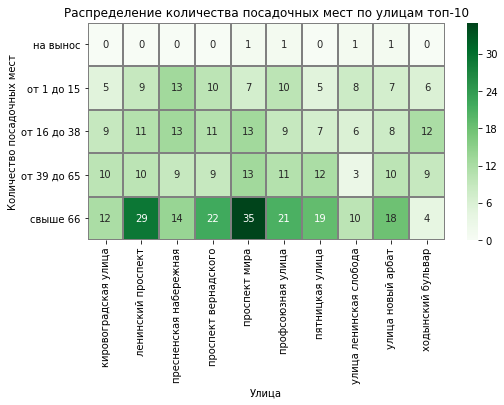

In [37]:
# Тепловая карта
plt.figure(figsize=(8, 4))
ax = sns.heatmap(top_streets_numb, cmap="Greens", annot= True, linewidths=1, linecolor='gray', vmin=0, vmax = 35)
ax.set_title('Распределение количества посадочных мест по улицам топ-10')
ax.set_xlabel('Улица')
ax.set_ylabel('Количество посадочных мест')
None
plt.savefig('streets_number.png')

##### Выводы

Были введены категории предприятия по количеству посадочных мест:
- на вынос
- от 1 до 15
- от 16 до 38
- от 39 до 65
- свыше 66

Для распределение количества посадочных мест по топ-10 улиц  была построена тепловая карта.
Наблюдаются закономерности:
- на проспектах больше всего предприятий с самым большим количеством посадочных мест(Проспект мира, Ленинский проспеки, Проспект Вернадского)
- на всех остальных улицах чаще всего располагаются  предприятия со средним количеством посадочных мест (от 16 до 38) или малым количеством(от 1 до 15)
- крайне редко, а то и вовсе не встречаются заведения без посадочных мест, с едой только на вынос

### 3. Презентация

[Презентация] (https://drive.google.com/file/d/1kXAYrQ-YQlGPAbV7sdErHBqDJQoiF0o3/view?usp=sharing) 

### 4. Выводы

Исследование рынка в области общественного питания по Москве показало:
- Чаще всего встречаются кафе, столовые, рестораны и предприятий быстрого обслуживания(фаст фуд)
- Львиная доля всех предприятий несетевые
- Сетевыми в большинстве случаев являются кафе, предприятия быстрого обслуживания(фаст фуд) и рестораны
- По количеству посадочных мест предприятия можно разделить на группы:
        - на вынос
        - от 1 до 15 посадочных мест
        - от 16 до 38 посадочных мест
        - от 39 до 65 посадочных мест
        - свыше 66 посадочных мест 
- Самое большое количество посадочных мест чаще встречается в столовых
- По количеству заведений лидирует Пресненская набережная в муниципальном округе Пресненский, десятку популярных улиц замыкает Профсоюзная муниципального округа Академический. Большинство улиц из списка топ-10 находятся в ЦАО Москвы.
- Количество улиц с одним объектом общественного питания 628
- На проспектах больше всего предприятий с самым большим количеством посадочных мест(Проспект мира, Ленинский проспект, Проспект Вернадского). На всех остальных улицах из списка топ-10 чаще всего располагаются  предприятия со средним количеством посадочных мест (от 16 до 38) или малым количеством(от 1 до 15)
- Практически не встречаются заведения без посадочных мест(только на вынос)

Рекомендации: возможно стоит разместить подобное оригинальное кафе на улицах из списка топ-10 в ЦАО Москвы со среднем или малым количеством посадочных мест. Также рекомендуется провести дополнительное исследование по посещаемости и среднему чеку в предприятиях, находящихся в предполагаемом районе размещения.
